#NUEVA VERSION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("datos_peru_MSCI.csv", index_col=0, parse_dates=True)
df.head()

/tmp/ipython-input-2906923332.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("datos_peru_MSCI.csv", index_col=0, parse_dates=True)


,BAP,SPCCPI1,BUENAVC1,IFS,MINSURI1,INRETC1,CVERDEC1,FERREYC1,CREDITC1,UNACEMC1,...,PODERC1,RIMSEGC1,CASAGRC1,BACKUAC1,NEXAPEC1,AENZAC1,SNJUANC1,CORAREC1,SIDERC1,CARTAVC1
2016-03-31,130.65,16.5,24.66,24.90,1.02,16.10,19.38,1.45,4.32,2.25,...,2.65,1.27,6.73,130.3,2.08,2.74,19.2,0.62,0.220,9.3
2016-04-01,130.70,16.5,24.66,25.84,1.03,16.85,20.40,1.47,4.35,2.25,...,2.65,1.27,7.12,128.0,2.10,2.80,19.2,0.62,0.225,9.3
2016-04-04,127.55,16.5,24.66,25.00,0.95,16.45,20.00,1.45,4.35,2.25,...,2.65,1.27,6.51,128.0,2.02,2.75,19.2,0.62,0.210,9.3
2016-04-05,127.50,16.5,24.66,25.00,0.95,16.20,20.00,1.45,4.35,2.20,...,2.65,1.27,6.50,128.0,2.02,2.80,19.2,0.62,0.188,9.3
2016-04-06,125.88,16.5,24.66,24.58,0.92,16.20,19.99,1.42,4.34,2.10,...,2.31,1.26,6.80,128.0,1.95,2.75,19.2,0.62,0.188,9.3


Eligiendo datos y periodos para la simulacion: Solo usamos una parte de la data, 4 empresas y 200 dias

In [2]:
data = df[['BAP','PODERC1','CREDITC1','CVERDEC1']].iloc[-201:-1]
data.head()

,BAP,PODERC1,CREDITC1,CVERDEC1
2024-06-17,154.40,8.0,3.30,39.50
2024-06-18,156.27,8.0,3.20,39.20
2024-06-19,157.80,8.0,3.30,39.70
2024-06-20,157.00,7.9,3.29,39.75
2024-06-21,159.00,8.0,3.29,40.00


Calculando los retornos (Wi)

In [3]:
#W = data / data.shift(1)
W = data.pct_change()
W.head(15).dropna()

,BAP,PODERC1,CREDITC1,CVERDEC1
2024-06-18,0.012111,0.000000,-0.030303,-0.007595
2024-06-19,0.009791,0.000000,0.031250,0.012755
2024-06-20,-0.005070,-0.012500,-0.003030,0.001259
2024-06-21,0.012739,0.012658,0.000000,0.006289
2024-06-24,-0.006289,0.003750,0.000000,-0.010000
2024-06-25,0.025316,0.000000,-0.027356,0.000000
2024-06-26,0.000000,0.000000,0.000000,-0.012626
2024-06-27,0.012346,0.000000,0.000000,0.012788
2024-06-28,-0.027500,-0.003736,0.012500,-0.010101
2024-07-01,0.003198,0.000000,0.000000,0.010204


1. Estimacion de la matriz de covarianzas

In [4]:
Q = W.cov()
Q

,BAP,PODERC1,CREDITC1,CVERDEC1
BAP,0.000238,0.000020,0.000023,0.000037
PODERC1,0.000020,0.000185,0.000014,0.000020
CREDITC1,0.000023,0.000014,0.000198,0.000002
CVERDEC1,0.000037,0.000020,0.000002,0.000134


2. Simulando retornos empleando choleski

In [5]:
from numpy.random import default_rng
rng = default_rng()
L = np.linalg.cholesky(Q)
N_muestras = 1000000
Z = rng.standard_normal(size=(N_muestras, Q.shape[1]))
W_sim = Z @ L.T
#print(W_sim)

3. Calculando X, para t=90

In [6]:
t = 90
mu = W.mean()
#print("Medias de los retornos")
#print(mu)
X = np.exp(mu.values + (t**0.5)*W_sim)
#print("Retornos simulados")
#print(X)

5. Generando el vector C a partir de un simplex empleando una distribucion de dirichlet:

In [8]:
rng = np.random.default_rng(42)
d = 4          # dimensión del simplex
n_samples = 300

# cada fila de samples es un vector en el simplex (suma 1, no negativo)
c = rng.dirichlet(alpha=np.ones(d), size=n_samples)

4. Calculamos Y, valores de los portafolios para todas las simulacion y distintos valores de C

In [9]:
Y = np.dot(X,c.T)
print(Y.shape)

(1000000, 300)


Cada columna de Y son los valores del portafolio para cada C definido, y cada fila de Y son los valores del portafolio para distintos valores de C de una solo simulacion. el numero de filas es igual al numero de simulaciones y el numero de columnas es igual al numero de C generados por el simplex. Por lo tanto se estan reusando los valores de las simulaciones para cada valor de C.

6. Calculando los valores de las medias y el ES(c)

In [10]:
Y_df = pd.DataFrame(Y)
p= 0.05 #5%
N = N_muestras
NP_entero = int(np.floor(N*p))
medias = Y_df.mean()

print(medias.shape)
print(NP_entero)

(300,)
50000


Ordenamos los valores de los portafolios usando QUICKSORT

In [11]:
Y_df_sorted = pd.DataFrame(
    np.sort(Y_df.values, axis=0, kind="quicksort"),
    columns=Y_df.columns
)
ESc= Y_df_sorted.iloc[0:NP_entero].sum(axis=0)/NP_entero
ESc

,0
0,0.847783
1,0.858996
2,0.842721
3,0.830927
4,0.849476
...,...
295,0.853269
296,0.799416
297,0.841546
298,0.833706


Graficando resultados

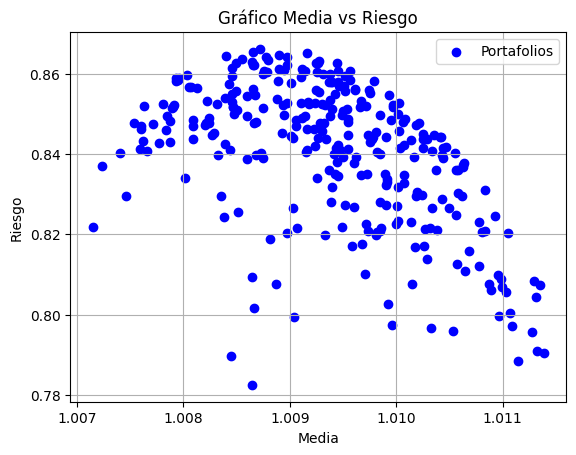

In [12]:
plt.scatter(medias, ESc, color='blue', label='Portafolios')
plt.xlabel("Media")
plt.ylabel("Riesgo")
plt.title("Gráfico Media vs Riesgo")
plt.legend()
plt.grid(True)
plt.show()